# Analyse 3

We vragen ons af of er meer doelpunten worden gemaakt wanneer 2 ploegen die ver uit elkaar staan in het klassement tegen elkaar spelen, dan in het geval de 2 ploegen dicht bij elkaar staan in het klassement. 
Verdeel voor elk seizoen het klassement denkbeeldig in 3 delen: 
- (1) de eerste 6 ploegen
- (2) de laatste 6 ploegen
- (3) alle ploegen ertussen (eventueel meer of minder dan 6)

Breid de dataframe wedstrijden uit met de positie van de thuisploeg en de uitploeg in het klassement (van de voorgaande speeldag!).
Breid de dataframe wedstrijden uit met het denkbeeldige deel van de thuisploeg en de uitploeg in het klassement: (1), (2) of (3)
Breid de dataframe wedstrijden uit met de categorie waartoe de wedstrijd behoort
- dicht: beide ploegen behoren tot hetzelfde denkbeeldige deel van het klassement (1), (2) of (3)
- gemiddeld: 1 ploeg behoort tot (1) of (2), de andere ploeg behoort tot (3)
- ver: 1 ploeg behoort tot (1) en de andere tot (2)

Bereken over alle seizoenen heen het totaal aantal wedstrijden én het totaal aantal doelpunten voor de 3 categorieën (dicht / gemiddeld / ver). Maak gebruik van wat aan bod komt in Data Science & AI Hoofdstuk 4 (Goodness of fit test) en wat je hiervoor berekend hebt om te berekenen of er significant meer gescoord wordt in de categorie ver dan in de categorie dicht

In [27]:
# De nodige packages importeren
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats


In [28]:
# Datasets inladen
wedstrijdendata = pd.read_csv("D:/Hogent/Visual Studio Code/DEP/DEP1-2023-2024-groep30/transfermarkt/data/correcte_data/wedstrijden.csv", sep=";")
klassementdata = pd.read_csv("D:/Hogent/Visual Studio Code/DEP/DEP1-2023-2024-groep30/transfermarkt/data/correcte_data/klassement.csv", sep=";")

In [29]:
# De eerste 10 rijen van de dataset bekijken
wedstrijdendata.head(10)

,Seizoen,Speeldag,Datum,Tijdstip,Id,StamnummerThuisploeg,RoepnaamThuisploeg,StamnummerUitploeg,RoepnaamUitploeg,StandThuis,StandUit
0,1960,1,1960-09-04,15:00,4008203,373,Sint-Truidense VV,16,Standard Luik,0,2
1,1960,1,1960-09-04,15:00,4008204,90,Eendracht Aalst,1,Royal Antwerp FC,3,2
2,1960,1,1960-09-04,15:00,4008205,246,Olympic Charleroi,35,RSC Anderlecht,0,7
3,1960,1,1960-09-04,15:00,4008206,13,Beerschot,33,Verviétois,1,0
4,1960,1,1960-09-04,15:00,4008207,3,Club Brugge,10,Union Saint-Gilloise,1,2
5,1960,1,1960-09-04,15:00,4008208,2,Daring Club Brussel,3434,Patro Eisden,2,1
6,1960,1,1960-09-04,15:00,4008209,4,RFC Luik,7,KAA Gent,2,1
7,1960,1,1960-09-04,15:00,4008210,553,Waterschei SV Thor,30,Lierse SK,5,0
8,1960,2,1960-09-11,15:00,4008211,16,Standard Luik,90,Eendracht Aalst,3,0
9,1960,2,1960-09-11,15:00,4008212,35,RSC Anderlecht,4,RFC Luik,2,3


In [30]:
# De eerste 10 rijen van de dataset bekijken
klassementdata.head(10)

,Seizoen,Speeldag,Stand,Stamnummer,Ploeg,AantalGespeeld,AantalGewonnen,AantalGelijk,AantalVerloren,DoelpuntenVoor,DoelpuntenTegen,Doelpuntensaldo,Links_Tweepuntensysteem,Rechts_Tweepuntensysteem,Driepuntensysteem
0,1960,1,1,35,RSC Anderlecht,1,1,0,0,7,0,7,2,0,3
1,1960,1,2,553,Waterschei SV Thor,1,1,0,0,5,0,5,2,0,3
2,1960,1,3,16,Standard Luik,1,1,0,0,2,0,2,2,0,3
3,1960,1,4,90,Eendracht Aalst,1,1,0,0,3,2,1,2,0,3
4,1960,1,5,2,Daring Club Brussel,1,1,0,0,2,1,1,2,0,3
5,1960,1,5,4,RFC Luik,1,1,0,0,2,1,1,2,0,3
6,1960,1,5,10,Union Saint-Gilloise,1,1,0,0,2,1,1,2,0,3
7,1960,1,8,13,Beerschot,1,1,0,0,1,0,1,2,0,3
8,1960,1,9,1,Royal Antwerp FC,1,0,0,1,2,3,-1,0,2,0
9,1960,1,10,3,Club Brugge,1,0,0,1,1,2,-1,0,2,0


In [31]:
# Functie om segment te bepalen
def segment_bepalen(positie, aantal_teams):
    if positie <= 6:
        return 1  # Top 6 teams
    elif positie > aantal_teams - 6:
        return 2  # Laatste 6 teams
    else:
        return 3  # Midden teams

# Functie om categorie te bepalen
def bepaal_categorie(deelklassement_thuis, deelklassement_uit):
    if deelklassement_thuis == deelklassement_uit:
        return 'dicht'
    elif (deelklassement_thuis in {1, 2} and deelklassement_uit == 3) or (deelklassement_uit in {1, 2} and deelklassement_thuis == 3):
        return 'gemiddeld'
    elif (deelklassement_thuis == 1 and deelklassement_uit == 2) or (deelklassement_thuis == 2 and deelklassement_uit == 1):
        return 'ver'
    return 'niet gedefinieerd'  # Voor onverwachte combinaties

def verwerk_en_categoriseer_wedstrijden(wedstrijden, klassement):
    # Omzetten van 'Seizoen' en 'Speeldag' naar strings voor consistentie
    wedstrijden['Seizoen'] = wedstrijden['Seizoen'].astype(str)
    klassement['Seizoen'] = klassement['Seizoen'].astype(str)
    wedstrijden['Speeldag'] = wedstrijden['Speeldag'].astype(int)
    klassement['Speeldag'] = klassement['Speeldag'].astype(int)

    # Kopieer klassement en pas de speeldag aan naar de vorige speeldag
    klassement_vorige_speeldag = klassement.copy()
    klassement_vorige_speeldag['Speeldag'] = klassement_vorige_speeldag['Speeldag'].astype(int) + 1

    # Samenvoegen op basis van seizoen, speeldag, en stamnummer voor thuisploeg
    wedstrijden = pd.merge(wedstrijden, klassement_vorige_speeldag[['Seizoen', 'Speeldag', 'Stamnummer', 'Stand']], left_on=['Seizoen', 'Speeldag', 'StamnummerThuisploeg'], right_on=['Seizoen', 'Speeldag', 'Stamnummer'], how='left')
    wedstrijden.rename(columns={'Stand': 'PositieKlassementThuisploeg'}, inplace=True)

    # Samenvoegen op basis van seizoen, speeldag, en stamnummer voor uitploeg
    wedstrijden = pd.merge(wedstrijden, klassement_vorige_speeldag[['Seizoen', 'Speeldag', 'Stamnummer', 'Stand']], left_on=['Seizoen', 'Speeldag', 'StamnummerUitploeg'], right_on=['Seizoen', 'Speeldag', 'Stamnummer'], how='left')
    wedstrijden.rename(columns={'Stand': 'PositieKlassementUitploeg'}, inplace=True)

    # Zorg dat posities integers zijn
    wedstrijden['PositieKlassementThuisploeg'] = wedstrijden['PositieKlassementThuisploeg'].fillna(0).astype(int)
    wedstrijden['PositieKlassementUitploeg'] = wedstrijden['PositieKlassementUitploeg'].fillna(0).astype(int)

    # Aantal teams in de competitie berekenen
    aantal_teams_per_seizoen = klassement.groupby('Seizoen')['Stamnummer'].nunique().to_dict()

    # berekenen van deel klassement
    wedstrijden['DeelKlassementThuisploeg'] = wedstrijden.apply(
        lambda x: segment_bepalen(x['PositieKlassementThuisploeg'], aantal_teams_per_seizoen[x['Seizoen']]), axis=1
    )
    wedstrijden['DeelKlassementUitploeg'] = wedstrijden.apply(
        lambda x: segment_bepalen(x['PositieKlassementUitploeg'], aantal_teams_per_seizoen[x['Seizoen']]), axis=1
    )
    # Toevoegen categorieën voor deel klassement
    wedstrijden['Categorie'] = wedstrijden.apply(lambda row: bepaal_categorie(row['DeelKlassementThuisploeg'], row['DeelKlassementUitploeg']), axis=1)

    # Filter om alleen de benodigde kolommen te behouden
    output_fields = [
        'Seizoen', 'Speeldag', 'Datum', 'Tijdstip', 'Id', 'StamnummerThuisploeg', 'RoepnaamThuisploeg', 
        'StamnummerUitploeg', 'RoepnaamUitploeg', 'StandThuis', 'StandUit', 'PositieKlassementThuisploeg', 
        'PositieKlassementUitploeg','DeelKlassementThuisploeg', 'DeelKlassementUitploeg', 'Categorie'
    ]
    wedstrijden = wedstrijden[output_fields]

    return wedstrijden

# uitvoeren van de functie
wedstrijden = verwerk_en_categoriseer_wedstrijden(wedstrijdendata, klassementdata)
wedstrijden.tail(10)

,Seizoen,Speeldag,Datum,Tijdstip,Id,StamnummerThuisploeg,RoepnaamThuisploeg,StamnummerUitploeg,RoepnaamUitploeg,StandThuis,StandUit,PositieKlassementThuisploeg,PositieKlassementUitploeg,DeelKlassementThuisploeg,DeelKlassementUitploeg,Categorie
17896,2023,29,2024-03-10,18:30,4098839,10,Union Saint-Gilloise,7,KAA Gent,1,1,1,7,1,3,gemiddeld
17897,2023,29,2024-03-10,19:15,4098842,4276,KAS Eupen,373,Sint-Truidense VV,1,0,15,9,2,3,gemiddeld
17898,2023,30,2024-03-16,18:15,4098844,16,Standard Luik,4276,KAS Eupen,4,0,10,14,3,2,gemiddeld
17899,2023,30,2024-03-16,20:45,4098843,35,RSC Anderlecht,19,KV Kortrijk,0,1,2,16,1,2,ver
17900,2023,30,2024-03-17,13:30,4098849,373,Sint-Truidense VV,3,Club Brugge,2,1,9,3,3,1,gemiddeld
17901,2023,30,2024-03-17,16:00,4098846,1,Royal Antwerp FC,10,Union Saint-Gilloise,1,1,4,1,1,1,dicht
17902,2023,30,2024-03-17,18:30,4098845,7,KAA Gent,22,R Charleroi SC,5,0,8,12,3,2,gemiddeld
17903,2023,30,2024-03-17,18:30,4098847,18,Oud-Heverlee Leuven,25,KV Mechelen,1,0,13,6,2,1,ver
17904,2023,30,2024-03-17,18:30,4098848,12,Cercle Brugge,5479,RWDM,4,0,7,15,3,2,gemiddeld
17905,2023,30,2024-03-17,18:30,4098850,2024,KVC Westerlo,322,KRC Genk,1,1,11,5,2,1,ver


In [32]:
import pandas as pd

def prepare_data(wedstrijden):
    # Valideer of de vereiste kolommen bestaan in de DataFrame
    if 'StandThuis' not in wedstrijden.columns or 'StandUit' not in wedstrijden.columns:
        raise ValueError("Missende kolommen: 'StandThuis' of 'StandUit' zijn vereist in de data.")

    # Berekenen van totaal aantal doelpunten
    wedstrijden['TotaalDoelpunten'] = wedstrijden['StandThuis'] + wedstrijden['StandUit']
    
    # Samenvatting per categorie berekenen
    samenvatting = wedstrijden.groupby('Categorie').agg(
        TotaalDoelpunten=('TotaalDoelpunten', 'sum'),
        TotaalWedstrijden=('Id', 'count')
    ).reset_index()
    
    return samenvatting

# Uitvoeren van de functies en printen van de samenvatting
samenvatting = prepare_data(wedstrijden)
print(samenvatting)

   Categorie  TotaalDoelpunten  TotaalWedstrijden
0      dicht             16100               5967
1  gemiddeld             21822               7709
2        ver             12339               4230


In [33]:
# Een logischere kruistabel maken
crosstab = pd.crosstab(index=samenvatting['Categorie'], values=samenvatting['TotaalDoelpunten'], aggfunc='sum', columns='Totalen')
crosstab['TotaalWedstrijden'] = samenvatting.set_index('Categorie')['TotaalWedstrijden']
print(crosstab)

col_0      Totalen  TotaalWedstrijden
Categorie                            
dicht        16100               5967
gemiddeld    21822               7709
ver          12339               4230


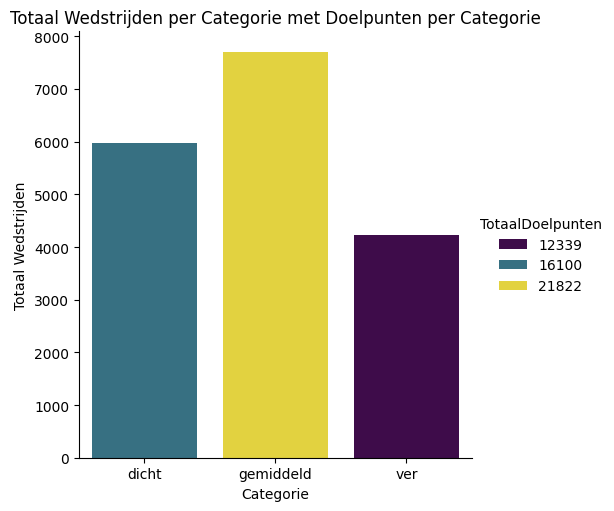

In [34]:
# Nu maken we de grafiek
sns.catplot(data=samenvatting, x='Categorie', y='TotaalWedstrijden', kind='bar', hue='TotaalDoelpunten', palette='viridis')
plt.title('Totaal Wedstrijden per Categorie met Doelpunten per Categorie')
plt.ylabel('Totaal Wedstrijden')
plt.xlabel('Categorie')
plt.show()

In [36]:
# Maak een kruistabel, hier simuleren we categorische variabelen vanuit de gegeven numerieke data
doelpunten_bins = pd.qcut(samenvatting['TotaalDoelpunten'], q=3, labels=["Laag", "Midden", "Hoog"]) # 3 doelpunten categorieën
crosstab = pd.crosstab(doelpunten_bins, samenvatting['Categorie'])

# Voer de Chi-kwadraat test uit
chi2, p, dof, expected = stats.chi2_contingency(crosstab)
g = stats.chi2.isf(0.05, dof)

print('Degrees of freedom:', dof)
print('Chi-squared:', chi2)
print('Critical value:', g)
print('p-value:', p)
print('Expected values:')
print(expected)

Degrees of freedom: 4
Chi-squared: 6.000000000000001
Critical value: 9.487729036781158
p-value: 0.19914827347145564
Expected values:
[[0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]
 [0.33333333 0.33333333 0.33333333]]
